4800
time:  0.016915559768676758
(10000,)


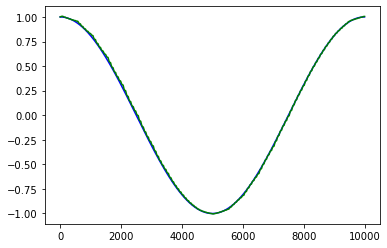

In [1]:
# Author: mike hagenow
# Test a variety of performance improvements to see if we can speed up learning for online use

import time
import numpy as np
import matplotlib.pyplot as plt
from corrective_shared_autonomy.TaskModels.DMPLWRhardcoded import DMP

k = 50
b = 2.0*np.sqrt(k)
dt = 0.01

dmp = DMP(k,b,dt)

samps_per_sec = 40
total_t = 2*60*samps_per_sec
data_comp = 1.0
total_t = int(total_t*data_comp)
print(total_t)

total_t = 10000

# data is a list of equal length arrays
data = []
t = np.linspace(0,4*np.pi,total_t)
in_data = np.cos(t)
data.append(in_data)

startt = time.time()
start,end,forcing = dmp.getForcing(data)
print("time: ",time.time()-startt)
x_out = dmp.getPath(start,end,forcing)
print(np.shape(forcing))

plt.plot(in_data,color='blue')
plt.plot(x_out,color='green')
plt.show()


In [2]:
# Time scaling analysis
k = 50
b = 2.0*np.sqrt(k)
dt = 0.01

dmp = DMP(k,b,dt)


ts = []
for ii in np.linspace(10,2*60*40,20):
    jj = int(ii)
    
    
    # data is a list of equal length arrays
    data = []
    t = np.linspace(0,4*np.pi,jj)
    in_data = np.sin(2.0*t)
    data.append(in_data)

    startt = time.time()
    start,end,forcing = dmp.getForcing(data)
    tempt = time.time()-startt
    ts.append(tempt)
    print(jj,tempt)
    x_out = dmp.getPath(start,end,forcing)
    
plt.plot(np.linspace(10,2*60*40,20),ts)
plt.show()
    

(1, 10)


ValueError: slice step cannot be zero